In [1]:
import networkx as nx
from graphlib.structures import Graph, Digraph
from graphlib.algorithms import DFS_with_cc, BFS_geodesic, BFS_search, weakly_components
from graphlib.tools import density, diameter, radius, geodesic_percentile_approximate

# Создание неориентированного невзвешенного графа
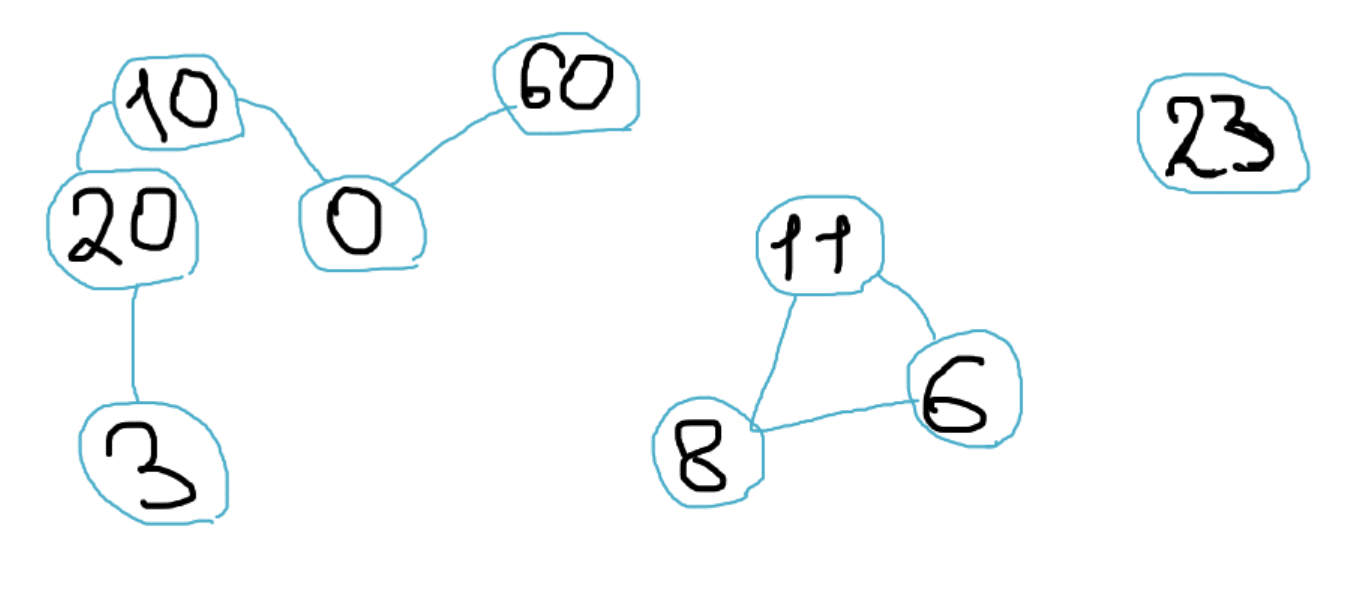

In [2]:
G = Graph(name='Example', nodes=['3', '10', '20', '0', '60', '11', '8', '6', '23'],
         edges=[('10', '0'), ('20', '10'), ('20', '3'), ('0', '60'), ('8', '11'), ("6", '11'), ('6', '8')])

# G.add_edge(10, 0)
# G.add_edge(20, 10)
# G.add_edge(20, 3)
# G.add_edge(0, 60)

# G.add_edge(8, 11)
# G.add_edge(6, 11)
# G.add_edge(6, 8)

print(G)

Граф <Example> с 9 вершинами and 7 ребрами


# Компоненты связности

In [3]:
number, largest_num, components = DFS_with_cc(G, largest=True)
print(f'Число компонент - {number}')
print(f'Компоненты:\n{components}')
print(f'Наибольшая компонента:\n{components[largest_num]}')

Число компонент - 3
Компоненты:
{1: {'3', '10', '0', '20', '60'}, 2: {'6', '11', '8'}, 3: {'23'}}
Наибольшая компонента:
{'3', '10', '0', '20', '60'}


In [4]:
# наибольшая компонента
largest_component = G.subgraph(nodes=['0', '3', '10', '20', '60'])
print(largest_component)

Граф <подграф::Example> с 5 вершинами and 4 ребрами


In [5]:
print('Вершины наибольшей компоненты: ', largest_component.nodes)
print('Ребра наибольшей компоненты: ', largest_component.edges)

Вершины наибольшей компоненты:  {'3', '10', '0', '20', '60'}
Ребра наибольшей компоненты:  {'10': ['0', '20'], '0': ['10', '60'], '3': ['20'], '20': ['10', '3'], '60': ['0']}


In [6]:
# случайный выбор 3х вершин из наибольшей компоненты
largest_component.selection(3)

{'20', '3', '60'}

# Поиск геодезического расстояния

In [7]:
def print_geo(u, dict_with_geo):
    for v in dict_with_geo.keys():
        if dict_with_geo[v] > 0:
            print(f'{u} ~[geo]~> {v}: {dict_with_geo[v]}')

In [8]:
geodesic23 = BFS_geodesic(G, '23')
print(geodesic23)

{'3': -1, '11': -1, '8': -1, '10': -1, '23': 0, '6': -1, '0': -1, '20': -1, '60': -1}


In [9]:
geodesic11 = BFS_geodesic(G, '11')
print_geo('11', geodesic11)

11 ~[geo]~> 8: 1
11 ~[geo]~> 6: 1


In [10]:
geodesic10 = BFS_geodesic(G, "10")
print_geo('10', geodesic10)

10 ~[geo]~> 3: 2
10 ~[geo]~> 0: 1
10 ~[geo]~> 20: 1
10 ~[geo]~> 60: 2


In [11]:
geodesic10_largest = BFS_geodesic(G, '10', largest=True)
print('Наибольшее геодезическое расстояние от вершины 10: ', geodesic10_largest)

Наибольшее геодезическое расстояние от вершины 10:  2


In [12]:
diam, node = diameter(largest_component, with_node=True)
print(f'Диаметр наибольшей компоненты связности: {diam}. Он достигается при старте из вершины {node}')

radius, node = radius(largest_component, with_central=True)
print(f'Диаметр наибольшей компоненты связности: {radius}. Центральной вершиной графа является {node}')

Диаметр наибольшей компоненты связности: 4. Он достигается при старте из вершины 3
Диаметр наибольшей компоненты связности: 2. Центральной вершиной графа является 10


In [2]:
G = Graph(edges=[('A','B'), ('C','B'), ('D','B'), ('D','C'), ('E','D')])
print(G)

Граф <null> с 5 вершинами and 5 ребрами


# Создание ориентированного графа
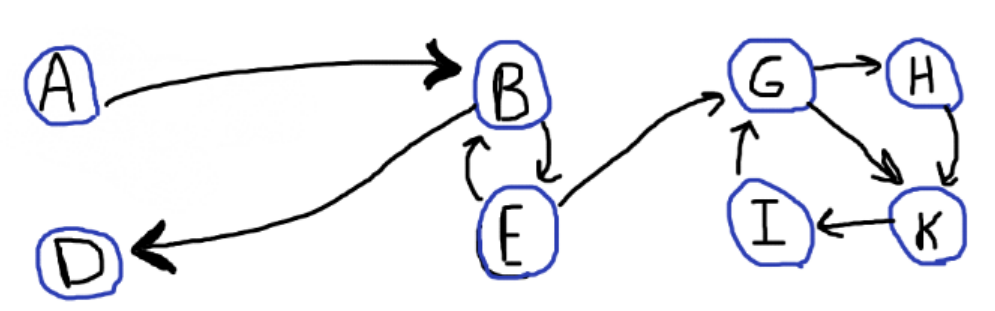

In [2]:
G = Digraph(name='test', edges=[('A', 'B'), ('B', 'D'), ('B', 'E'), ('E', 'B'),
                                ('E', 'G'), ('G', 'K'), ('K', 'I'), ('I', 'G'),
                                ('G', 'H'), ('H', 'K')])
print(G)

Ориентированный граф <test> с 8 вершинами and 10 ребрами


In [3]:
# поиск путей
print(BFS_search(G, start_u='B', finish_v='A'))
print(BFS_search(G, start_u='A', finish_v='I'))

None
['A', 'B', 'E', 'G', 'K', 'I']


In [4]:
# конвертирование в обычный граф
g_simple = G.to_simple()
print(g_simple)

Граф <неориентированный граф, лежащий в основе test> с 8 вершинами and 9 ребрами


In [5]:
# компоненты слабой связности
print(weakly_components(G))

(1, {1: {'E', 'G', 'K', 'B', 'A', 'H', 'I', 'D'}})


In [6]:
# подграф
sub = G.subgraph(nodes=['A', 'D', 'E', 'G'])
print(sub)

Ориентированный граф <подграф::test> с 4 вершинами and 1 ребрами


In [7]:
# степени исхода
print(G.node_degrees())

[('B', 2), ('E', 2), ('G', 2), ('A', 1), ('K', 1), ('I', 1), ('H', 1), ('D', 0)]


In [12]:
# инвертирование
invert = G.invert()
print(invert.edges)

{'E': ['B'], 'G': ['E', 'I'], 'K': ['G', 'H'], 'A': [], 'B': ['E', 'A'], 'I': ['K'], 'H': ['G'], 'D': ['B']}


In [13]:
print(G.edges)

{'A': ['B'], 'B': ['D', 'E'], 'D': [], 'E': ['B', 'G'], 'G': ['K', 'H'], 'K': ['I'], 'I': ['G'], 'H': ['K']}


In [3]:
G_nx = nx.DiGraph()
G_nx.add_edges_from([('A', 'B'), ('B', 'D'), ('B', 'E'), ('E', 'B'),
                                ('E', 'G'), ('G', 'K'), ('K', 'I'), ('I', 'G'),
                                ('G', 'H'), ('H', 'K')])

In [5]:
G_nx.number_of_edges()

10

In [20]:
list(nx.strongly_connected_components(G_nx))
meta = nx.condensation(G_nx)
print('Мета-граф:')
print('вершин: ', meta.number_of_nodes())
print('ребер:', meta.number_of_edges())

Мета-граф:
вершин:  4
ребер: 3
